In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [2]:
#import datacsv
customer= pd.read_csv(r"C:\Users\kmaye\Downloads\python case study\Case Study 1 - Retail Case Study\Customer.csv")
product = pd.read_csv(r"C:\Users\kmaye\Downloads\python case study\Case Study 1 - Retail Case Study\prod_cat_info.csv")
transaction= pd.read_csv(r"C:\Users\kmaye\Downloads\python case study\Case Study 1 - Retail Case Study\Transactions.csv")


In [3]:
transaction.shape

(23053, 10)

 ### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly
 

In [4]:
customer_final = pd.merge(customer, transaction, left_on='customer_Id', right_on='cust_id', how='right')
customer_final = pd.merge(customer_final, product, left_on=['prod_subcat_code', 'prod_cat_code'], right_on = ['prod_sub_cat_code','prod_cat_code'],how='left')
customer_final.shape

(23053, 17)

### 2. Prepare a summary report for the merged data set.
    a. Get the column names and their corresponding data types
    b. Top/Bottom 10 observations
    c. Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
    d. Frequency tables for all the categorical variables

In [5]:
## a. Get the column names and their corresponding data types

print("Columns names : data types  ")
print(customer_final.dtypes)


Columns names : data types  
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object


In [6]:
#change the data type of tran_date  and DoB
customer_final['tran_date']=customer_final['tran_date'].str.replace('/','-')
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'],format='%d-%m-%Y')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format='%d-%m-%Y')


In [7]:
## b. Top 10 observations

print('Top 10 Observations : ')
customer_final.head(10)

Top 10 Observations : 


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women
1,270384,1973-05-11,F,8.0,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers
2,273420,1992-07-27,M,8.0,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
3,271509,1981-06-08,M,3.0,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath
4,273420,1992-07-27,M,8.0,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
5,272357,1982-10-09,F,6.0,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,8,Personal Appliances
6,273667,1981-05-29,M,9.0,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,11,Bath
7,271489,1971-04-21,M,9.0,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,12,Tools
8,275108,1971-11-04,F,8.0,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,3,Kids
9,269014,1979-11-27,F,3.0,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,8,Personal Appliances


In [8]:
##bottom 10 observation
print('Bottom 10 Observations : ')
customer_final.tail(10)

Bottom 10 Observations : 


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,271982,1976-08-10,M,8.0,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,10,Non-Fiction
23044,273982,1991-10-12,M,4.0,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,4,Mobiles
23045,273031,1980-01-17,F,8.0,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,6,DIY
23046,272049,1975-06-28,F,6.0,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,11,Bath
23047,266866,1974-04-18,M,4.0,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,4,Kids
23048,274550,1972-02-21,M,7.0,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic
23049,270022,1984-04-27,M,9.0,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens
23050,271020,1976-06-20,M,8.0,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing
23051,270911,1970-05-22,M,2.0,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children
23052,271961,1982-01-15,M,1.0,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,11,Children


In [9]:
## c. five number summary
print('Five-Number Summary')
customer_final.describe().T

Five-Number Summary


,count,mean,std,min,25%,50%,75%,max
customer_Id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
city_code,23045.0,5.482534e+00,2.863499e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01
transaction_id,23053.0,5.007348e+10,2.898194e+10,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
cust_id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
prod_subcat_code,23053.0,6.149091e+00,3.726372e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23053.0,3.763632e+00,1.677016e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23053.0,2.432395e+00,2.268406e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23053.0,6.363697e+02,6.223635e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23053.0,2.486672e+02,1.871778e+02,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,23053.0,2.107308e+03,2.507561e+03,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03


In [10]:
##  d. Frequency tables for all the categorical variables
categorical_cols = customer_final.select_dtypes(include=['object']).columns

for column in categorical_cols:
    print(f"\nFrequency table for {column}:\n")
    print(customer_final[column].value_counts())



Frequency table for Gender:

M    11811
F    11233
Name: Gender, dtype: int64

Frequency table for Store_type:

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

Frequency table for prod_cat:

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

Frequency table for prod_subcat:

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod_sub

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [11]:

continuous_columns = customer_final.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = customer_final.select_dtypes(include=['object']).columns 

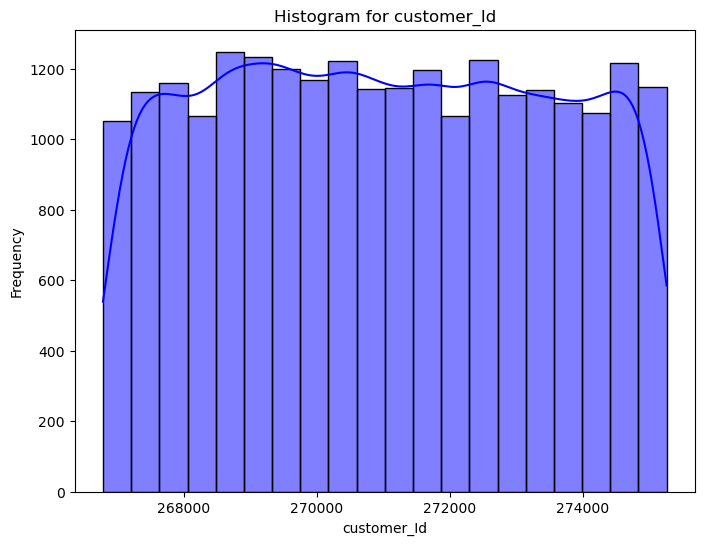

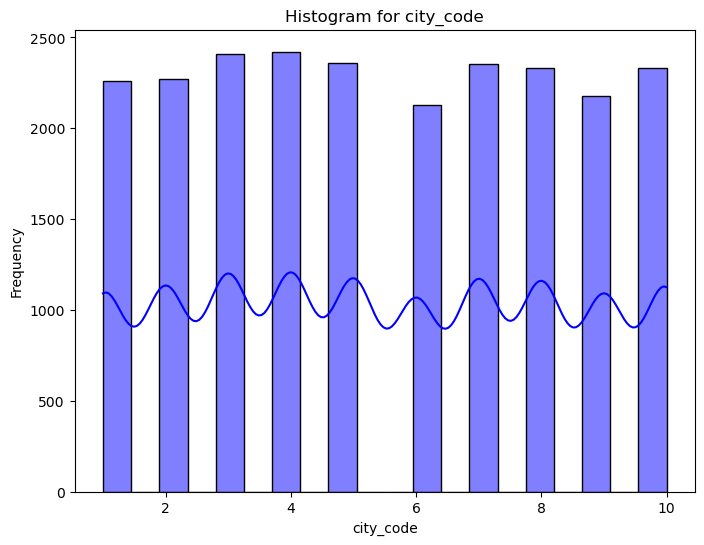

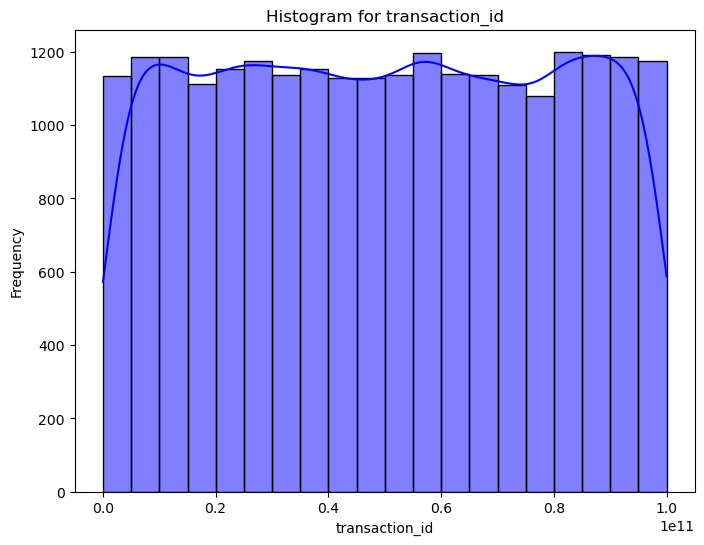

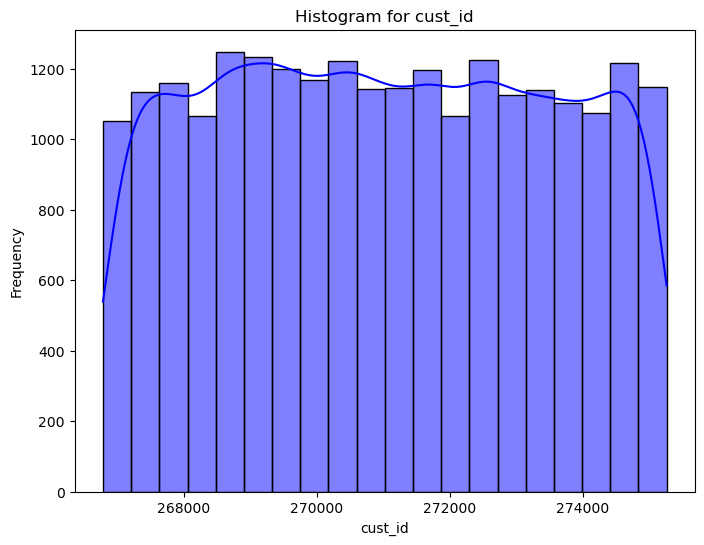

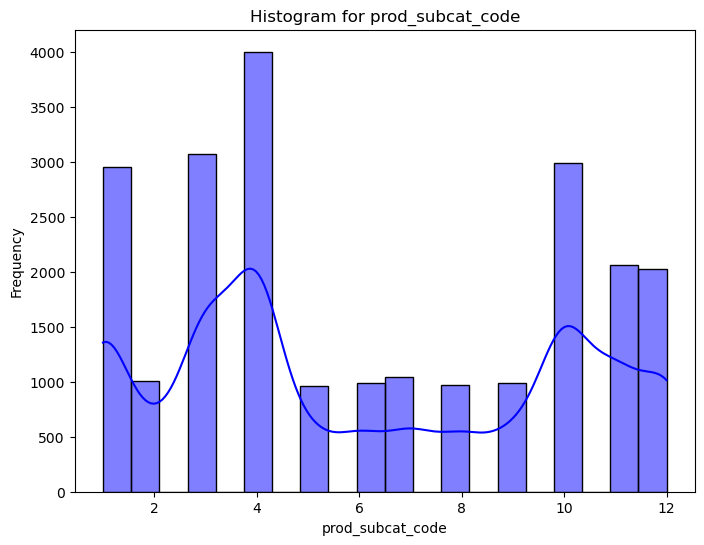

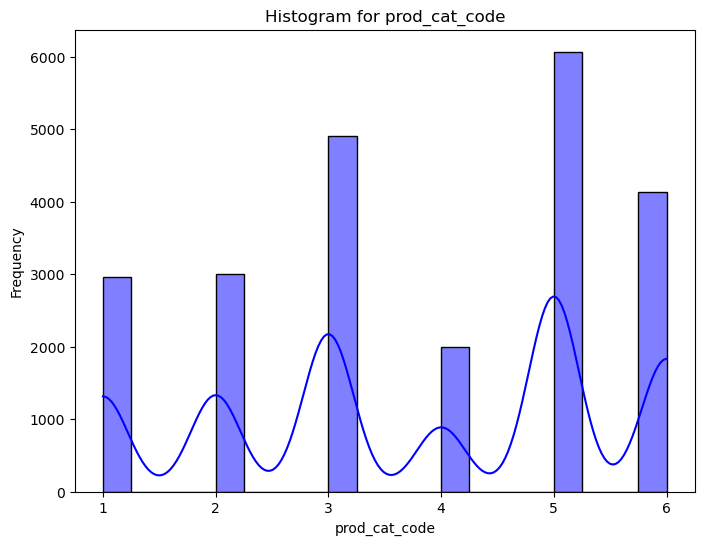

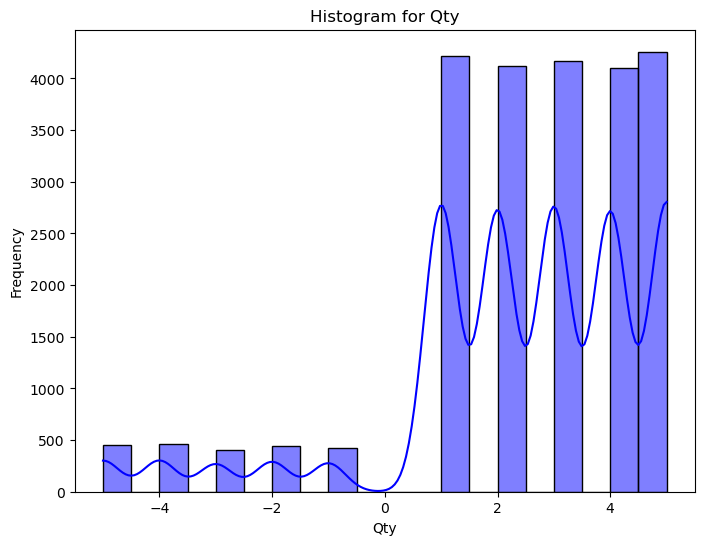

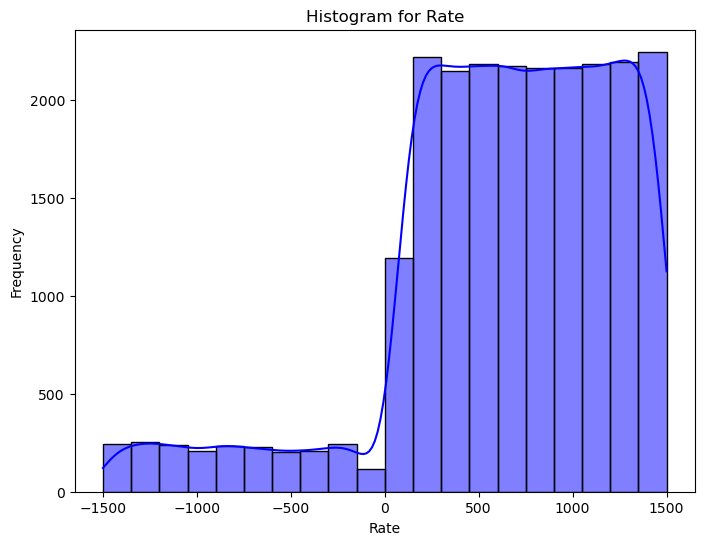

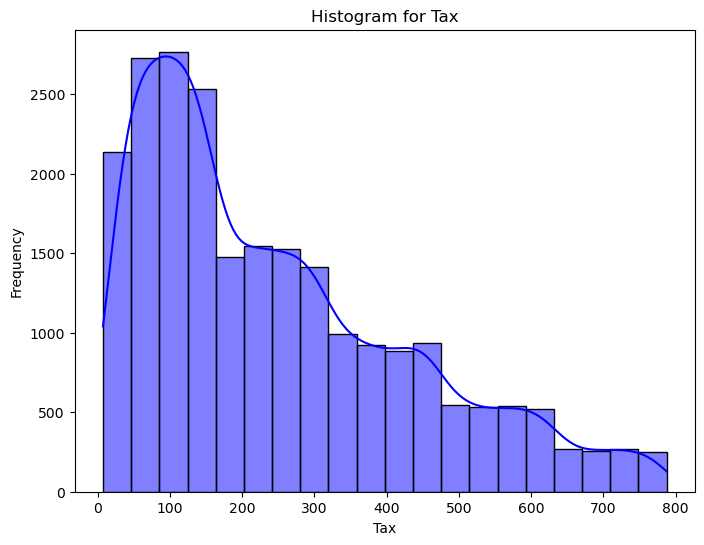

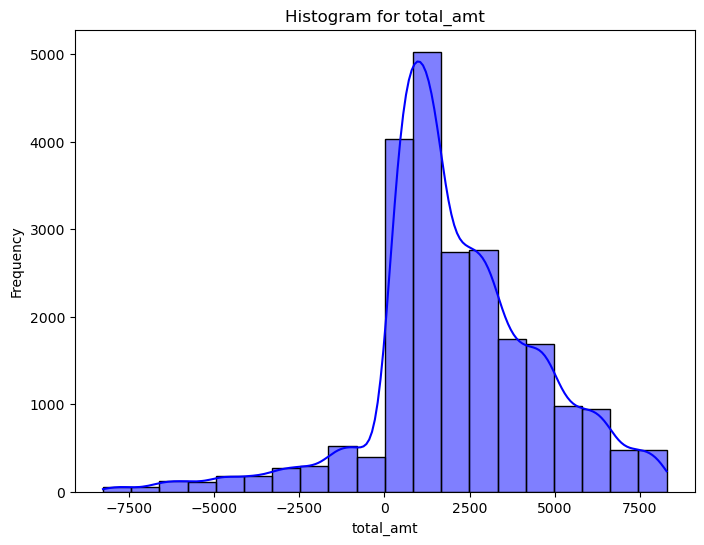

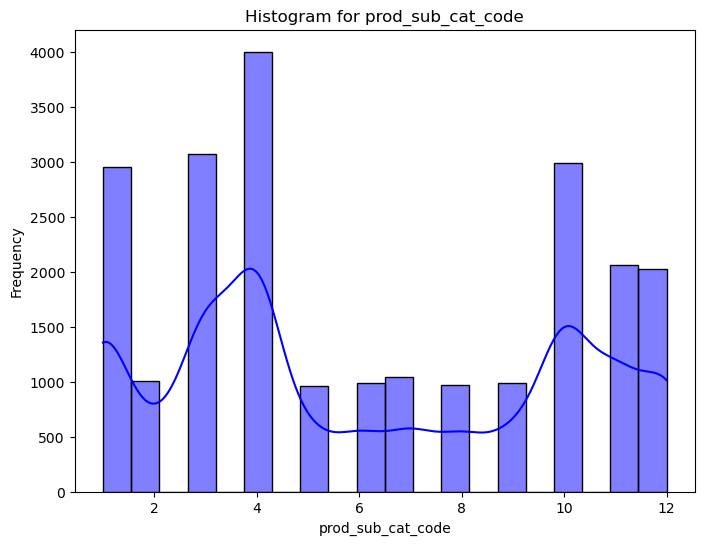

In [15]:
for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(customer_final[column], bins=20, kde=True, color='blue')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

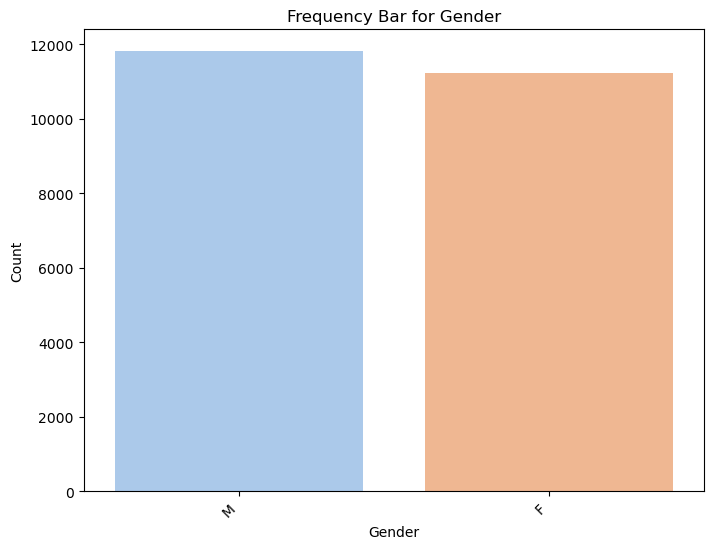

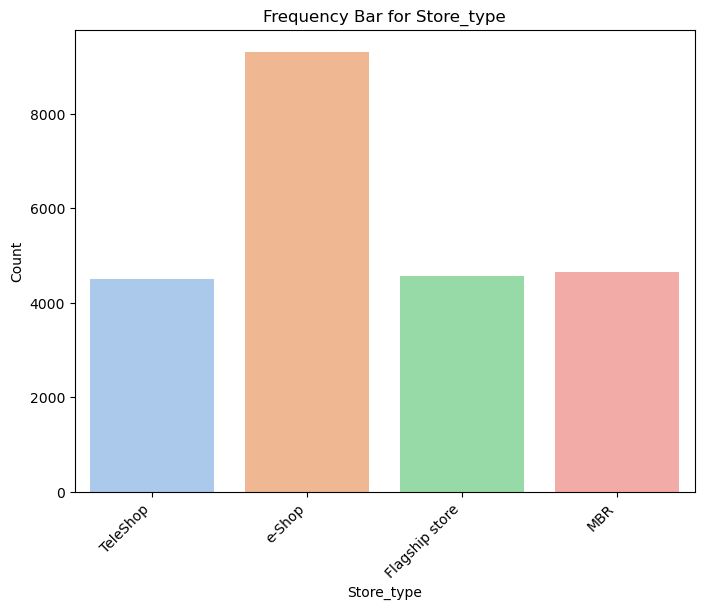

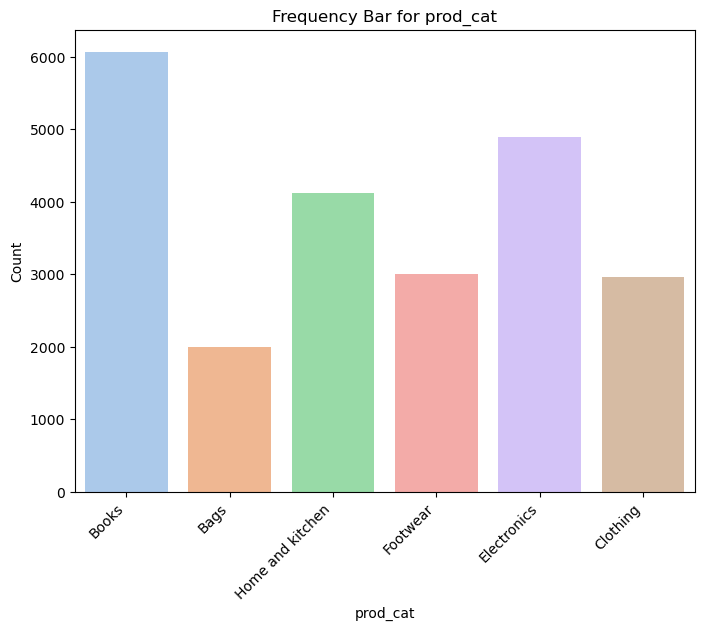

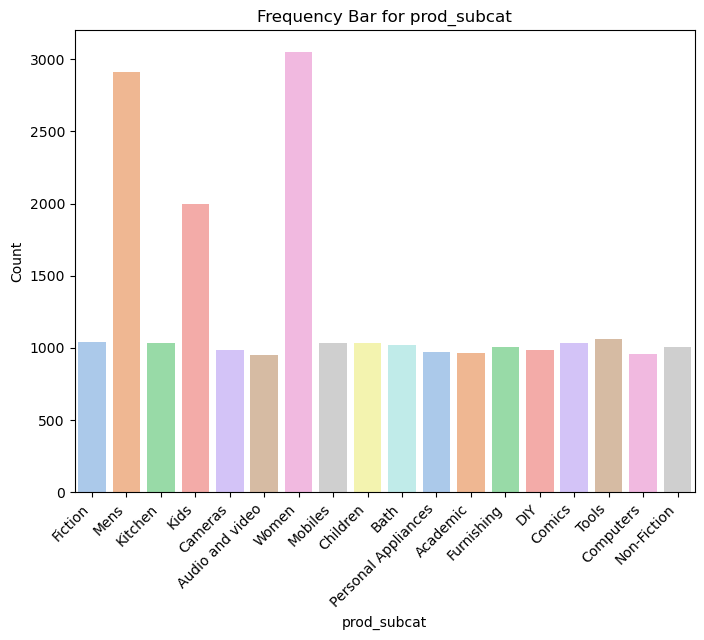

In [19]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x= customer_final[column], palette='pastel')
    plt.title(f'Frequency Bar for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') 
    plt.show()
    

### 4. Calculate the following information using the merged dataset :
     a. Time period of the available transaction data
     b. Count of transactions where the total amount of transaction was negative

In [20]:
## a.time period of the available transaction data
start_date = customer_final['tran_date'].min()
end_date = customer_final['tran_date'].max()
print(f"a. time available data:")
print(f"   Start Date: {start_date}")
print(f"   End Date: {end_date}")



a. time available data:
   Start Date: 2011-01-25 00:00:00
   End Date: 2014-02-28 00:00:00


In [17]:
## b.Count of transactions where the total amount of transaction was negative 
negative_transactions_count = customer_final[customer_final['total_amt'] < 0].shape[0]
print(f"\nb. negative transaction count: {negative_transactions_count}")



b. negative transaction count: 2177


### 5. Analyze which product categories are more popular among females vs male customers.

In [8]:
customer_final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

no of product bought by female and male:
Gender               F     M
prod_cat                    
Bags               754   770
Books             1677  1801
Clothing          1021  1099
Electronics       1485  1602
Footwear          1083  1060
Home and kitchen  1321  1398


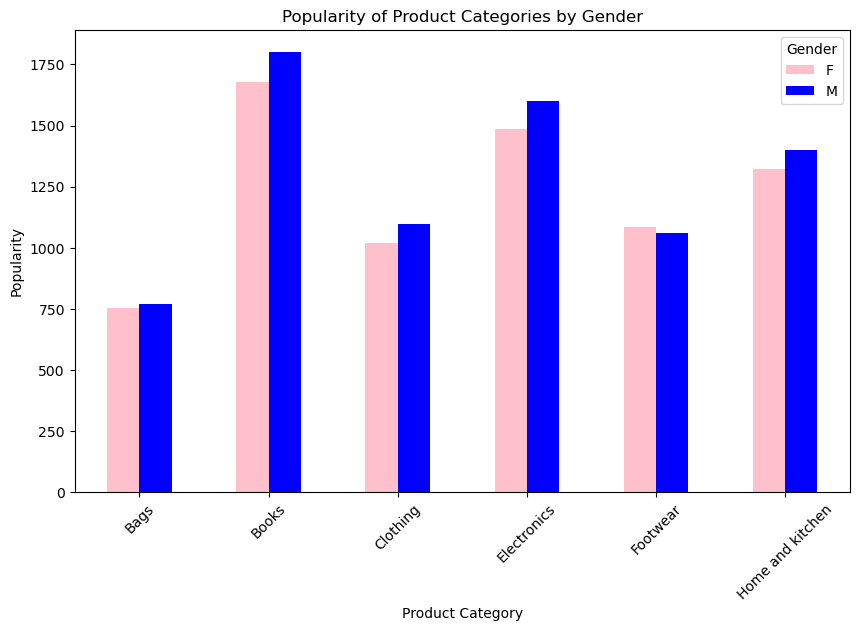

In [10]:
prod_popularity = customer_final.groupby(['prod_cat','Gender'])['cust_id'].nunique().unstack('Gender')
print(f'no of product bought by female and male:\n{prod_popularity}')

# Plot the bar chart
prod_popularity.plot(kind='bar', figsize=(10, 6), color=['pink', 'blue'])
plt.xlabel('Product Category')
plt.ylabel('Popularity')
plt.title('Popularity of Product Categories by Gender')
plt.legend(title='Gender')
plt.xticks(rotation=45)  
plt.show()

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [13]:
# Assuming 'city_code' is the column indicating the city code
city_customer_counts = customer_final.groupby(['city_code'])['cust_id'].nunique()
print(f'city_customer_counts:\n{city_customer_counts}')

# Find the city code with the maximum customers
max_city_code = city_customer_counts.idxmax()

# Find the percentage of customers from that city
percentage_customers_max_city = (city_customer_counts[max_city_code] / (customer_final['cust_id'].nunique()) )* 100

print(f"The city code with the maximum customers is {max_city_code}.")
print(f"The percentage of customers from that city is {percentage_customers_max_city:.2f}%.")


city_customer_counts:
city_code
1.0     535
2.0     546
3.0     576
4.0     569
5.0     570
6.0     516
7.0     563
8.0     551
9.0     532
10.0    546
Name: cust_id, dtype: int64
The city code with the maximum customers is 3.0.
The percentage of customers from that city is 10.46%.


### 7. Which store type sells the maximum products by value and by quantity?

In [18]:
store_type_stats = customer_final.groupby('Store_type').agg({'Qty': 'sum', 'total_amt': 'sum'})
max_qty_store_type = store_type_stats['Qty'].idxmax()
max_value_store_type = store_type_stats['total_amt'].idxmax()
print(f"max quantity: {max_qty_store_type}")
print(f"max value: {max_value_store_type}")


max quantity: e-Shop
max value: e-Shop


### 8.What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [63]:
categories = ['Electronics', 'Clothing']
filtered_data = customer_final[(customer_final['Store_type'] == 'Flagship store') 
                               & (customer_final['prod_cat'].isin(categories))]
total_amount_earned = filtered_data['total_amt'].sum()
print(f"The total amount: {total_amount_earned:.2f}")

The total amount: 3409559.27


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [20]:
filtered_data = customer_final[(customer_final['Gender'] == 'M') & (customer_final['prod_cat'] == 'Electronics')]

total_amount_earned = filtered_data['total_amt'].sum()

print(f"amount by male under electronics : {total_amount_earned:.2f}")


amount by male under electronics : 5703109.42


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [20]:
filtered_data = customer_final[customer_final['total_amt'] > 0]
customers_more_than_10_transactions = filtered_data.groupby('customer_Id')['transaction_id'].nunique().reset_index()
customers_more_than_10_transactions=customers_more_than_10_transactions[customers_more_than_10_transactions['transaction_id']>10]
num_customers_more_than_10_transactions =len(customers_more_than_10_transactions)

print(f"no. of customers (after removing transactions with negative amounts) is: {num_customers_more_than_10_transactions}")


no. of customers (after removing transactions with negative amounts) is: 6


In [26]:
filtered_data = customer_final[customer_final['total_amt'] > 0]
customers_more_than_10_transactions = filtered_data.groupby('customer_Id').filter(lambda x: x['transaction_id'].nunique() > 10)
num_customers_more_than_10_transactions = customers_more_than_10_transactions['customer_Id'].nunique()

print(f"no. of customers (after removing transactions with negative amounts) is: {num_customers_more_than_10_transactions}")


no. of customers (after removing transactions with negative amounts) is: 6


### 11. For all customers aged between 25 - 35, find out:
    a. What was the total amount spent for “Electronics” and “Books” product categories?
    b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [28]:
current_date = pd.Timestamp.now()
customer_final['Age'] = ((current_date - customer_final['DOB']).dt.days/365.25).astype('int')
filtered_customers = customer_final[(customer_final['Age'] >= 25) & (customer_final['Age'] <= 35)]


In [29]:
# a. What was the total amount spent for "Electronics" and "Books" product categories?
electronics_books_total_amount = filtered_customers[filtered_customers['prod_cat'].isin(['Electronics', 'Books'])][ 'total_amt'].sum()

print(f" total amount electronics and books: {electronics_books_total_amount:.2f}")

# b. What was the total amount spent by these customers between 1st Jan, 2014, to 1st Mar, 2014?
filtered_customers_jan_mar = filtered_customers[(filtered_customers['tran_date'] >= '2014-01-01') & (filtered_customers['tran_date'] <= '2014-03-01')]
total_amount_jan_mar = filtered_customers_jan_mar['total_amt'].sum()

print(f"The total amount by customer : {total_amount_jan_mar:.2f}")


 total amount electronics and books: 4688176.87
The total amount by customer : 524568.92
